# Greed & Envy - an AI-inspired dating strategy

*AI teaches us to embrace the Envious Exploiter lifestyle, but with responsibility. If you are younger than 25, and expect to live up to 80, you should **seriously reconsider** changing jobs and partners around **5 times a year**. If you are 35 or older, however, you **will need AI counseling** in order to fine tune your strategy and reap the benefits of Envious Exploitation. Otherwise you run a serious risk of ruining your life!*

### Love advice from a Reinforcement Learning Agent

In this article we will revisit the age-old exploration vs. exploitation dilemma as applied to our daily lives. To change or to commit - that is our Shakespearean question, and the exact answer has mathemathical reasons. Here we will present the interpretation of the results with a focus on mating strategies, while the math and programming will be presented in the Appendix.  

Let me introduce you to **Agent Smith**. He is a ruthlessly efficient AI of multiple personalities, and is a dating expert.  

<img src="agent_smith.jpg" alt="Agent Smith - your dating coach" style="width: 500px;"/>

Agent Smith has extensive experience in running after girls across countless years and many multiverses. Over time he has had opportunity to hone his 5 favorite strategies into 5 distinct subpersonalities (any resemblance to my real-life friends is pure coincidence):
1. **True Thomas:** TT is your regular guy-next-door. He generally stays with the girl he believes is best, but on the rare occasion he gets wasted he may wake up next to a random female $(adventurousness=2\%)$.
- **Pragmatic Patrick:** Now PP is the calculating kind of person, and you are just an item on his to-do list. He believes that change in moderation is healthy, therefore every now and then he just tries something different $(adventurousness=10\%)$. If he likes what he sees, he switches.
- **Restless Rascal:** RR is an undiscriminating playboy who follows the carpe diem philosophy, and mostly takes whatever life serves to him $(adventurousness=50\%)$.
- **Envious Exploiter:** EE is *totally greedy*, never trying opportunities that seem suboptimal $(adventurousness=0\%)$. However, he is also *totally envious*: he has unrealistically positive fantasies about the girls he has not yet had. Therefore his very greed combined with his envy is what pushes him to actually seek out adventure! His motto is: *the grass is always greener on the other side*. As his wisdom about the "other side" accumulates, he gradually settles down for exploitation.
- **Security Stan:** Stan is just terrible. His fake morals are a facade used to hide the fact that deep down he is a *totally greedy security exploiter* $(adventurousness=0\%)$. He is afraid of the unknown, therefore he will choose the first girl that wants him and stick with her forever (as now this opportunity seems the best in the world). He will also subtly remind you of your moral inferiority whenever he gets the chance. Nobody really likes him for being a spineless hypocrite, but hey, Agent Smith loves to troll people, and as long as Agent Smith finds him amusing, Stan stays in the race.  

And now let me introduce the **girls**. Everybody who has ever seen a women's magazine knows there are exactly **144 types** of them. True fact, women are complicated. For the uninitiated: you can arrive at the same number if you square the number of the zodiac signs found in the last pages of the magazine. The birth sign accounts for one power, and the ascendant for the other. Mystery solved.

In [52]:
display(HTML('<table><tr><td style="background-color: white;"><img src="disney_princess_zodiac.jpg" alt="12 Princesses" style="width: 300px;"/></td><td style="background-color: white; font-size: 5em;"><b>×</b></td><td style="background-color: white;"><img src="disney_princess_zodiac.jpg" alt="12 Princesses" style="width: 300px;"/></td><td style="background-color: white; font-size: 5em;"><b>=&nbsp&nbsp 144</b></td></tr></table>'))

,×,,= 144


### Cut to the chase, Mr. Smith!
Ok, ok... here goes the data:

The chart below depicts the performance of Agent Smith's dating personalities. Since Smith is a law-abiding gentleman (*lawful evil*, for DnD geeks), he always starts his love life at 18 years old. But boy is he intense once he starts out: ha takes a decision whether to immediately dump his girlfriend for another one *every single week*! 

The horizontal logarithmic axis represents the number of weeks that have passed since Agent Smith's 18-th birthday. A few important birthdays have been marked for easier navigation.  

The vertical performance metric shows the **average quality of lovers up until now**. 100% would be the ideal dream-life: finding the very best girl right away and staying with her your whole life. Fun fact: you can achieve more than 100% with a bit of "cheating". This can happen because the metric reflects your subjective perception of your lovers' quality - which is always subject to circumstantial, environmental and sensory noise (think: ups and downs, alcohol, make-up, dark and foggy pub, etc...). But in the end, it's what you experience that really counts, and not what it should or ought have been.  

Let us analyze the strategies one by one.

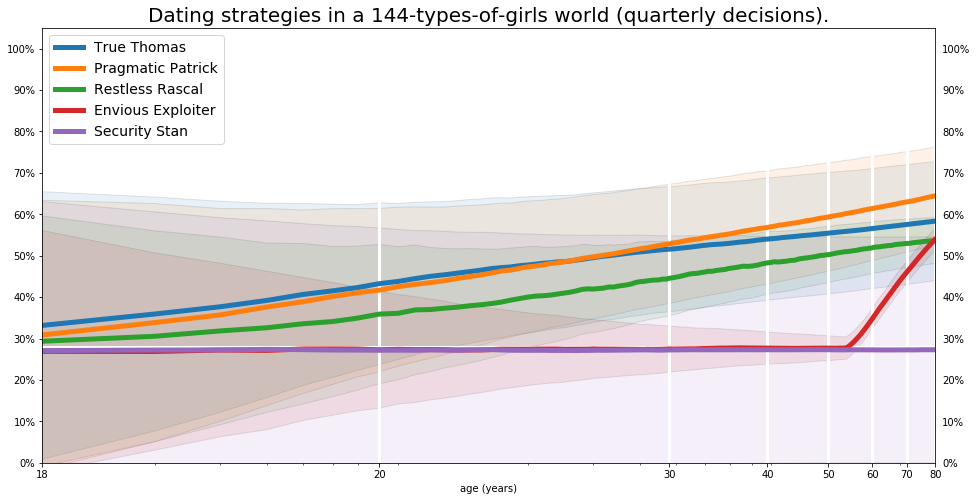

In [279]:
with open("RL01-GreedEnvy_Data.pickle", 'rb') as fp:
    average_quality_pc, data = pickle.load(fp, encoding='latin1')
plot_dating_performances(average_quality_pc, data, freq=4, nof_timesteps=(80-18)*4)

**Security Stan** as a strategy has a very predictable mean performance equaling the average girl quality, which is around 28% of the best. But each individual Stan has a very different life (hence the wide purple standard deviation band). Each Stan will experience a lifetime of constant quality corresponding to the girl that he first met. There will be Stan instances with terrible lives (close to 0% or even below), and there will be a few lucky Stans with a constant 100% life. OK, so now we understand why Agent Smith loves this personality... if you have lives to spare, Stan is the way to go! Once out of every 144 lives you **will** find the perfect girl right away! As for the other lives... just discard them. 

The **Envious Exploiter** seems to lag behind in the first three years being as miserable as Security Stan... but then something happens and he goes on a rampage in his roaring twenties beating everyone else and retaining supremacy at least for a few centuries. Of course, - unlike Agent Smith, who is immortal - *you* would expect to live up to 80, but with the medical advances we have you never know... And if 2018 seems like an unimportant date from the previous century, then you probably are already immortal, or you are an AI, or something in between. Still, you might like this advice, as there is only one thing worse than a miserable life: a wretched eternity.

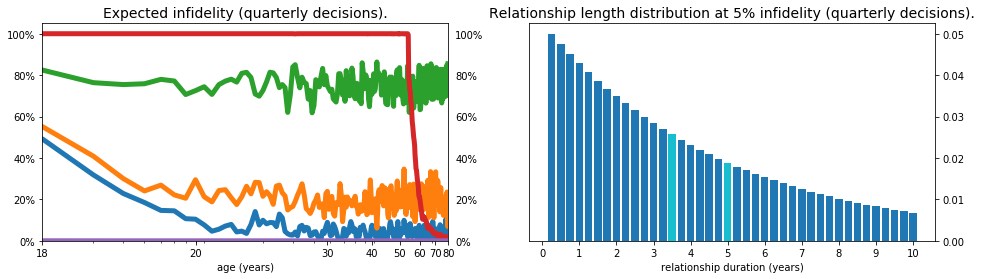

In [273]:
plot_infidelity(data, freq=4, nof_timesteps=(80-18)*4)

Let us consider the various *opportunities* in life. For any given kind of opportunity (jobs, spouses, etc.), we would sure want to find the perfect match early on and stick with it for a long time, in order to maximize the *quality* of our overall experience.  

Due to the complexity of factors inherent in any real-life opportunity, we can safely assume a Gaussian distribution of qualities (across different opportunities of the same kind). The distribution parameters we choose for our discussion bear no real significance, i.e. any arbitrary choice of parameters would not impact the overall conclusions. Still, having a general positive outlook on life, we will assume mean quality $\mu=1$ and standard deviation $\sigma=1$ for convenience. Thus we will represent the fact that in life most opportunities are perceived as taking us forward in some way or another (especially in hindsight), but some of them are perceived as actually and irredeemably negative.  

Let us observe a sample of $n=10000$ opportunities assuming the smallest noticable difference (quantum) between two opportunities' qualities is $0.1$. The number of available opportunities $n$ is the first parameter of our model. The quantum size is fixed.

In [47]:
%config IPCompleter.greedy=True
from IPython.display import HTML, display
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [2]:
def gen_opports(n):
    """Generates the true qualities of n opportunities taken from the normal distribution (mu=1, sigma^2=1)."""
    return np.around(np.random.normal(1, 1, n), 1)

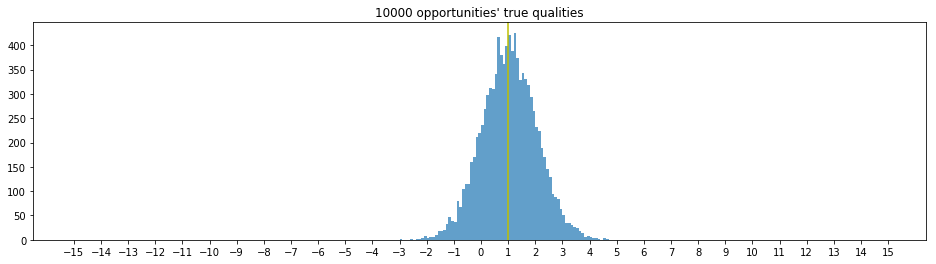

In [27]:
# Display histogram of 10000 random generated opportunities' true qualities
opps = gen_opports(10000)
quants = np.arange(-15, 15, 0.1)

plt.close('all')
plt.figure(figsize=(16, 4))
plt.hist(opps, bins=quants, alpha=0.7)
plt.axvline(x=1.0, color='y')
plt.xticks(np.arange(-15, 15.1))
plt.title("10000 opportunities' true qualities")
plt.show()

### Change is hard. Changing people is harder.
It is a well established fact of history and psychology that changing the course of the world is much harder than changing our own course. This resonates with Newton's first law of motion: an object will remain at rest or in uniform motion in a straight line unless acted upon by an external force. Common sense tells us that the force necessary to change another person (let alone a bunch of other persons, e.g. a whole company's culture or strategic course) is immesurably larger than the force necessary to change ourselves and seek out a better opportunity.  

Therefore it seems statistically reasonable to disregard our chances of being the next Steve Jobs, Napoleon, or Joanne d'Arc, and to pragmatically constrain ourselves to modeling opportunities as **fundamentally constant** over the long term. The possibility of a spontaneous change in the environment unrelated to our efforts will be addressed in the next paragraph.  

### The elusiveness of subjectivity
We will also regard the seemingly improving and deteriorating drift in conditions as a *constant* condition: someone who rises through the ranks and receives regular professional training at their job enjoys a *constant* high quality opportunity, while someone who often struggles to find a part-time job for the next week enjoys a *constant* low quality opportunity. To tackle these kinds of rather philosophical problems we can always redefine our quality metric such that it reflects not the change in circumstances, but the rate of change in circumstances (the derivative). In the end, this kind of simplification is entirely justified, as what really matters is the quality of the individual's subjective experience of a given opportunity. When we ask an individual to rate the overall quality of their current opportunity on a scale from 0 to 10 as they have experienced it up until now, they will always be able to come up with such a singular, scalar metric - and this is exactly what we are modeling. This metric, evaluated with accumulating experience, will approach an idealized *true quality* $q^*$. This is our Archimedean fulcrum to get a grasp on the vast, complex and heterogenous domain of generalized opportunities, and to make it available for calculation and comparison at least within an individual's world of subjective values.

### Appearances can be deceiving
Short term ups and downs in our experience with a given opportunity certainly can and will occur as a random Gaussian noise, arising from the opportunity's specific functional rhythm, from random circumstances, and from the inaccuracy of our own perception.  

The short term noise around the long term true quality $q^*$ will be characterized by the quality's standard deviation, which we will call *volatility* $v$ (not to be confused with volatility from financial mathematics). Not all opportunity instances of the same kind will have the same volatility, however, but will display a gamma distribution around the mean volatility $\mu_v = k_v\theta_v$. The $k_v$ and $\theta_v$ of the volatility distribution are the second and third parameters of our model.

The short term noise clouds our perception and impairs our judgement. Only experience will tell, whether our first impressions of an opportunity were right. Let's take a look at the distribution of 10000 first impressions of a single opportunity $A$ with true quality $q^*=3$ and volatility $v=3$.

In [95]:
class Opportunity:
    def __init__(self, true_q, volatility):
        self.true_q = true_q
        self.volatility = volatility
        
    def get_impressions(self, n):
        return np.around(np.random.normal(self.true_q, self.volatility, n), 1)

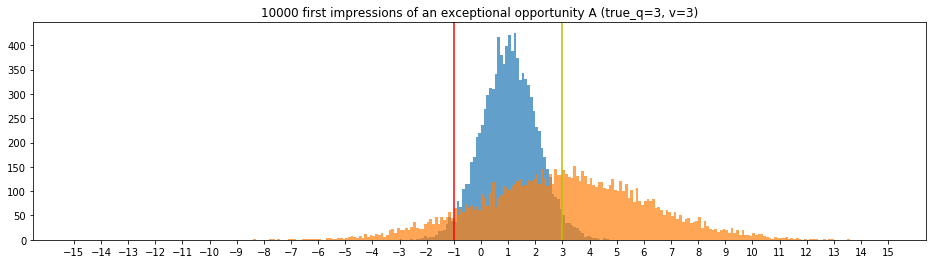

In [30]:
# Display quality histogram of 10000 different first impressions of a true_q=3 opportunity.
oppA = Opportunity(3, 3)
impressions = oppA.get_impressions(10000)
quants = np.arange(-15, 15, 0.1)

plt.close('all')
plt.figure(figsize=(16, 4))
plt.hist(opps, bins=quants, alpha=0.7)
plt.hist(impressions, bins=quants, alpha=0.7)
plt.axvline(x=3.0, color='y')
plt.axvline(x=-1.0, color='r')
plt.xticks(np.arange(-15, 15.1))
plt.title("10000 first impressions of an exceptional opportunity A (true_q=3, v=3)")
plt.show()

The orange distribution denotes first impressions of the exceptionally good opportunity $A$ with $q^*=3$. Even though the opportunity actually belongs to the top 2.3% of possible opportunities (blue distribution), 9% of the observers will perceive it as terribly bad at first glance. These 9% will mistakenly believe that the opportunity at hand belongs to the lowest 2.3% of all opportunities (to the left of the red line) - and will certainly pass up on it without second thought.

### Learning by exploration
Just like small children, as long as we don't have enough information about the available possibilites, we would do best to experiment and try unknown opportunities by chance in order to gather impressions, and then gradually settle with the one that seems best. We should even contemplate giving a second chance to opportunities that seemed worst - because it might just have been a bad day and they could turn out to be best in the end.  

Let us now observe how 100 explorers gradually learn more and more as they integrate new observations into their estimates of the true quality of above mentioned exceptional opportunity A. The experience-integration will be a simple average across all the observed impressions. For the sake of consistency with AI literature, let us denote the impression at time $t$ from now on as $R_t$, which stands for *Reward* - the terms *reward* and *impression* will be used interchangeably from now on. Estimated quality of $A$ at time $t$ (after receiving the reward $R_t$) will be denoted as $Q_t(A)$. The simple average can then be calculated as follows:  

$$
\begin{align}
Q_t(A)&=\frac{R_1+R_2+\dots+R_t}{t}\\
Q_{t+1}(A)&=\frac{R_1+R_2+\dots+R_t+R_{t+1}}{t+1}\\
&=\frac{R_1+R_2+\dots+R_t}{t+1}+\frac{R_{t+1}}{t+1}\\
&=\frac{t}{t+1}\frac{R_1+R_2+\dots+R_t}{t}+\frac{1}{t+1}R_{t+1}\\
&=\frac{t+1-1}{t+1}Q_t(A)+\frac{1}{t+1}R_{t+1}\\
&=Q_t(A)-\frac{1}{t+1}Q_t(A)+\frac{1}{t+1}R_{t+1}\\
&=Q_t(A)+\frac{1}{t+1}\left(R_{t+1}-Q_t(A)\right)\\
\end{align}
$$

Ergo:
$$
Q_t(A)=Q_{t-1}(A)+\frac{1}{t}\left(R_t-Q_{t-1}(A)\right)
$$

In order to avoid any initialization bias, we should define the initial estimate: $$Q_0=0$$

In [82]:
def form_estimates(impressions, initial_ests=None):
    """Refine the initial (n, 1) estimates using (n, m) impressions.
    n: number of observers
    m: number of impressions (timesteps)"""
    if initial_ests is None:
        initial_ests = np.zeros((impressions.shape[0],1))
    q_estimates = np.append(initial_est, impressions, axis=1)
    for t in np.arange(1, q_estimates.shape[1]):
        q_estimates[:,t] = q_estimates[:,t-1] + (1/t)*(q_estimates[:,t]-q_estimates[:,t-1])
    return q_estimates[:,1:]

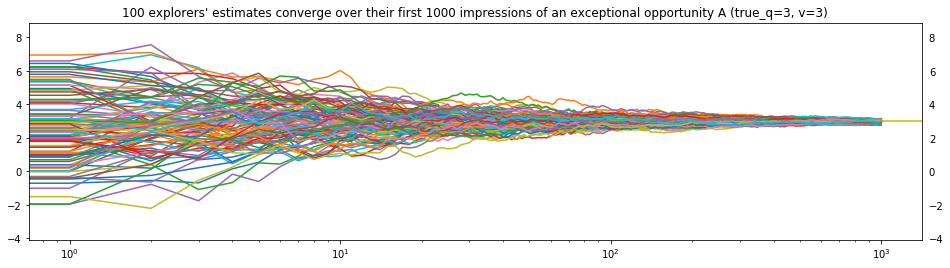

In [83]:
nof_explorers = 100
nof_impressions = 1000
oppA = Opportunity(3, 3)

# 100 explorers receive 1000 impressions each
impressions = oppA.get_impressions((nof_explorers, nof_impressions))  
q_estimates = form_estimates(impressions)

# Plot
xs = np.arange(q_estimates.shape[1])
plt.close('all')
plt.figure(figsize=(16, 4))
plt.tick_params(labelright=True)
plt.yticks(np.arange(-4, 10.1, 2))
plt.axhline(y=3.0, color='y')
for i in np.arange(q_estimates.shape[0]):
    plt.semilogx(xs, q_estimates[i])
plt.title("100 explorers' estimates converge over their first 1000 impressions of "\
          "an exceptional opportunity A (true_q=3, v=3)")
plt.show()

Thus extensive exploration seems to be a good idea in order to learn the truth (due to the __[law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers)__). Note the unrealistically high and low early estimates. They represent the overblown and misguided fantasies we are prone to develop in both directions when we encounter something (or someone) new.   

However, be warned: those who undiscriminately give third and fourth chances to bad opportunities and never settle for the best, will eventually waste their life exploring suboptimal spaces and will never grow up to reap the benefits of their knowledge.

### Finding the best of ten
Now we will take a look at three strategies in an environment with 10 different opportunities. The volatility parameters will be default $k=2$, $\theta=0.5$.  

Measure of success for a given strategy is the *percentage* of the achieved reward/step ratio averaged across 100 explorers and 1000 steps compared to the maximum reward/step achievable in the very long run. Thus the success metric falls between 0% and 100%.

- **strategy 1)** Total exploration
- **strategy 2)** Total exploitation
- **strategy 3)** Exploration to exploitation

### Strategy 1) Total exploration
Total exploration is easily implemented, because the agent always chooses randomly among opportunities $A_1, A_2, \dots, A_{100}$ (also called *Actions* in AI literature). The agents never get to actually use their accumulated knowledge to guide their decisions.

In [91]:
def gen_opportunities(n, k=2, theta=0.5):
    """Generates n opportunities with
    true quality taken from the normal distribution (mu=1, sigma^2=1), and
    volatility taken from the gamma distribution (k, theta)."""
    true_qs = np.random.normal(1, 1, n)
    volatilities = np.random.gamma(k, theta, n)
    opportunities = []
    for i in range(n):
        opportunities.append(Opportunity(true_qs[i], volatilities[i]))
    return opportunities

def rewards_per_step(rewards):
    """Calculate reward/step at each timestep from (n, m) rewards.
    n: number of agents
    m: number of rewards (timesteps)"""
    return form_estimates(rewards)
    

In [214]:
nof_opportunities = 10
nof_timesteps = 1000
nof_agents = 100

world = gen_opportunities(nof_opportunities)
possible_impressions = np.zeros((nof_agents, nof_timesteps, nof_opportunities))
for o in range(nof_opportunities):
    possible_impressions[:,:,o] = world[o].get_impressions((nof_agents, nof_timesteps))

rewards = np.zeros((nof_agents, nof_timesteps))
for t in range(nof_timesteps):
    choices = np.random.randint(0, nof_opportunities, (nof_agents,))
    rewards[:,t] = possible_impressions[np.arange(nof_agents),t,choices]
    
rps = rewards_per_step(rewards)

true_qualities = np.array([opp.true_q for opp in world])
best_quality = np.max(true_qualities)
average_quality_pc = np.mean(true_qualities)/best_quality
rps_pc = rps/best_quality
rps_pc_mean = np.mean(rps_pc, axis=0)

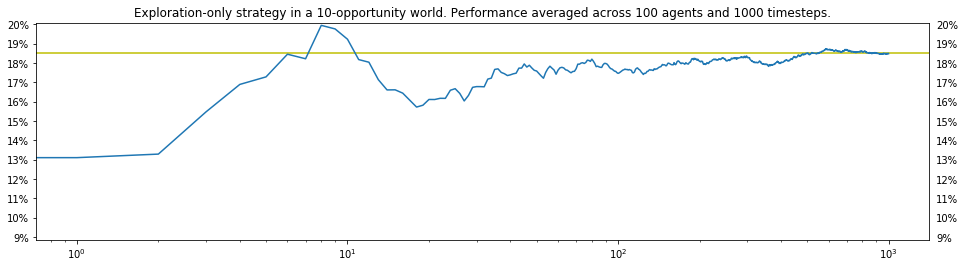

In [215]:
# Plot
xs = np.arange(rps_pc.shape[1])
yup = max(np.max(rps_pc_mean)-average_quality_pc, 0)
ydown = max(average_quality_pc-np.min(rps_pc_mean), 0)
plt.close('all')
plt.figure(figsize=(16, 4))
plt.yticks(np.arange(0.0, 1.001, 0.01))
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.ylim((average_quality_pc-ydown*1.1, average_quality_pc+yup*1.1))
plt.tick_params(labelright=True)
plt.axhline(y=1.0, color='r')
plt.axhline(y=average_quality_pc, color='y')
plt.semilogx(xs, rps_pc_mean)
plt.title("Exploration-only strategy in a 10-opportunity world. "+
          "Performance averaged across 100 agents and 1000 timesteps.")
plt.show()

It can be seen from the graph that the *exploration-only strategy* has brought no real benefits as it converges towards the average quality, which is only a fraction of the theoretically achievable max quality (100%).

### Strategy 2) Total exploitation
In total exploitation, every agent will immediately opt for the best opportunity known to them at every step. This is also known as the **greedy approach**.  
There are two variants to this strategy:
- **a) the Security Exploiter:** when the initial estimates are low, and
- **b) the Envious Exploiter:** when the initial estimates are high.  

**a) The Security Exploiter**  
With equally low initial estimates every agent will choose a random opportunity and stick with it forever (as now this opportunity seems the best in the world). Some of the extremely loyal and steadfast people you know could very well be total security exploiters. Although on average this strategy leads to an average quality of life, there could be large individual differences which persist forever (unlike in the total exploration strategy, where each individual also converges towards the average).  

**b) The Envious Exploiter**  
With equally high initial estimates however, something interesting happens. There is substantial initial incentive for exploration, as *the grass always seems greener on the other side*, i.e. the unexplored always seems better than what we currently have, at least until it becomes thoroughly explored. Let us observe the average performance of 100 Envious Exploiters that employ both **envy and greed** in the same 10-opportunity world from the previous example.

In [94]:
class WorldOfOpportunities:
    def __init__(self, true_qs, volatilities):  # np.ndarray (nof_opps,)
        self.nof_opps = true_qs.shape[0]
        self.true_qs = true_qs
        self.volatilities = volatilities
        
    def get_impressions(self, n):
        """Returns (n, nof_opps) impressions"""
        return np.around(np.random.normal(self.true_qs, self.volatilities, (n, self.nof_opps)), 1)
    
    @classmethod
    def gen_world(cls, n, k=2, theta=0.5, random_seed=None):
        """Generates n opportunities with
        true quality taken from the normal distribution (mu=1, sigma^2=1), and
        volatility taken from the gamma distribution (k, theta)."""
        np.random.seed(random_seed)
        true_qs = np.random.normal(1, 1, n)
        volatilities = np.random.gamma(k, theta, n)
        np.random.seed()
        return WorldOfOpportunities(true_qs, volatilities)

class AgentEnsemble:
    def __init__(self, world, nof_agents=1, lifespan=1000, preconceptions=None, exploration_prob=0):
        self.world = world
        self.nof_agents = nof_agents
        self.exploration_prob = exploration_prob
        if preconceptions is None:
            preconceptions = np.mean(world.true_qs)
        else:
            preconceptions = np.mean(world.true_qs) + preconceptions
        self.beliefs = np.ones((nof_agents, self.world.nof_opps)) * preconceptions
        self.belief_reinforcements = np.zeros_like(self.beliefs)
        self.rewards = np.zeros((nof_agents, lifespan))
        self.rewards_per_step = np.zeros((nof_agents, lifespan))
        self.choices = np.ones((nof_agents, lifespan)) * -1
        self.changes = np.zeros((nof_agents, lifespan))
        self.age = 0
        self.lifespan = lifespan
        
    def choose_next(self):
        if self.exploration_prob <= np.random.rand():
            choice_with_ties = self.beliefs==(np.ones_like(self.beliefs)*self.beliefs.max(axis=1, keepdims=True))
            return np.argmax(np.random.random(self.beliefs.shape) * choice_with_ties, axis=1)
            # return np.random.choice(np.flatnonzero(self.beliefs==self.beliefs.max()))
        else:
            return np.random.randint(0, self.beliefs.shape[1], self.nof_agents)
        
    def _perform(self, actions):
        # record choices
        self.changes[:, self.age] = (actions != self.choices[:, self.age])
        self.choices[:, self.age:] = actions[:, np.newaxis]
        # calculate rewards
        act_rewards = self.world.get_impressions(1)[0][actions]
        self.rewards[:, self.age] = act_rewards + (self.rewards[:, self.age-1] if self.age>0 else 0)
        self.rewards_per_step[:, self.age] = self.rewards[:, self.age] / (self.age+1)
        # integrate experience
        self.age += 1
        self.belief_reinforcements[np.arange(self.belief_reinforcements.shape[0]), actions] += 1
        t = self.belief_reinforcements[np.arange(self.belief_reinforcements.shape[0]), actions]  # (nof_agents,)
        across_agents = np.arange(self.beliefs.shape[0])
        self.beliefs[across_agents, actions] = \
                             self.beliefs[across_agents, actions] + \
                             (1/t)*(act_rewards-self.beliefs[across_agents, actions])
        
    def act_next(self):
        self._perform(self.choose_next())
        
    def act(self, nof_timesteps=0, random_seed=None):
        np.random.seed(random_seed)
        if nof_timesteps > self.lifespan-self.age or nof_timesteps == 0:
            nof_timesteps = self.lifespan-self.age
        for t in range(nof_timesteps):
            self.act_next()
        np.random.seed()
        return self
            
    def get_results(self):
        """RPS%mean, RPS%std, CHG%"""
        rps_pc = self.rewards_per_step/np.max(self.world.true_qs)
        return np.mean(rps_pc, axis=0), np.std(rps_pc, axis=0), np.mean(self.changes, axis=0)
    
class EnviousChangeAgent(AgentEnsemble):
    def __init__(self, world, nof_agents=1, lifespan=1000, late_preconceptions=+10, exploration_prob=0.02, \
                 change_at_age=35, amnesia_ratio=1.0):
        super().__init__(world, nof_agents, lifespan, None, exploration_prob)  # instantiate without preconceptions
        self.preconceptions = late_preconceptions
        self.change_at_age = change_at_age
        self.change_of_heart = False
        self.amnesia_ratio = amnesia_ratio
        
    def _perform(self, actions):
        super()._perform(actions)
        # at 35 years old, suddenly become totally Greedy and Envious
        if not self.change_of_heart and self.age >= (self.change_at_age-18)*52:
            self.exploration_prob=0
            self.beliefs = self.beliefs + np.ones_like(self.beliefs) * self.preconceptions
            self.belief_reinforcements = (self.belief_reinforcements * (1.0-self.amnesia_ratio)).astype(int)
            self.change_of_heart = True

In [161]:
nof_opportunities = 50
nof_timesteps = 1000
nof_agents = 1000

world = gen_world(nof_opportunities)
agents = Agents(world=world, nof_agents=nof_agents, lifespan=nof_timesteps, preconceptions=10, exploration_prob=0)

agents.act()
rps = agents.rewards_per_step

best_quality = np.max(world.true_qs)
average_quality_pc = np.mean(world.true_qs)/best_quality
rps_pc = rps/best_quality
rps_pc_mean = np.mean(rps_pc, axis=0)

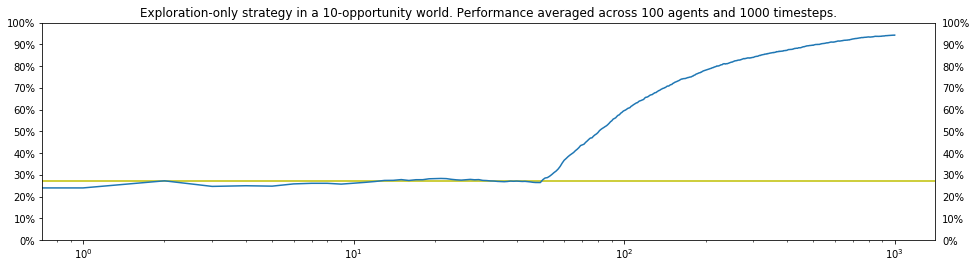

In [162]:
# Plot
xs = np.arange(rps_pc.shape[1])
plt.close('all')
plt.figure(figsize=(16, 4))
plt.yticks(np.arange(0.0, 1.001, 0.1))
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.ylim((0, 1))
plt.tick_params(labelright=True)
plt.axhline(y=average_quality_pc, color='y')
plt.semilogx(xs, rps_pc_mean)
plt.title("Exploration-only strategy in a 10-opportunity world. "+
          "Performance averaged across 100 agents and 1000 timesteps.")
plt.show()

### Strategy 3) Exploration to exploitation


In [159]:
nof_opportunities = 50
nof_timesteps = 1000
nof_agents = 1000

world = gen_world(nof_opportunities)
agents = Agents(world=world, nof_agents=nof_agents, lifespan=nof_timesteps, preconceptions=1, exploration_prob=0.1)

agents.act()
rps = agents.rewards_per_step

best_quality = np.max(world.true_qs)
average_quality_pc = np.mean(world.true_qs)/best_quality
rps_pc = rps/best_quality
rps_pc_mean = np.mean(rps_pc, axis=0)

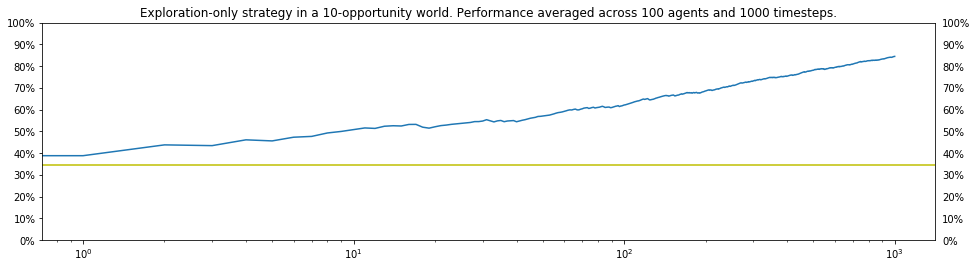

In [160]:
# Plot
xs = np.arange(rps_pc.shape[1])
plt.close('all')
plt.figure(figsize=(16, 4))
plt.yticks(np.arange(0.0, 1.001, 0.1))
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.ylim((0, 1))
plt.tick_params(labelright=True)
plt.axhline(y=average_quality_pc, color='y')
plt.semilogx(xs, rps_pc_mean)
plt.title("Exploration-only strategy in a 10-opportunity world. "+
          "Performance averaged across 100 agents and 1000 timesteps.")
plt.show()

### Final chart

In [91]:
def calc_dating_strategies(nof_worlds=1, nof_opportunities = 144, \
                           nof_agents = 50, nof_timesteps = 100000, \
                           seed = 105):
    NOF_STRATS = 9
    average_quality_pc = 0
    overall_results = []
    for i in range(NOF_STRATS):
        overall_results.append((np.zeros(nof_timesteps), np.zeros(nof_timesteps), np.zeros(nof_timesteps)))
    
    for w in range(nof_worlds):
        world = WorldOfOpportunities.gen_world(nof_opportunities, random_seed=seed+w)
        average_quality_pc += (1/(w+1)) * (np.mean(world.true_qs)/np.max(world.true_qs) - average_quality_pc)

        agent01_GG = AgentEnsemble(world, nof_agents, nof_timesteps, preconceptions=None, exploration_prob=0.02)
        agent02_PP = AgentEnsemble(world, nof_agents, nof_timesteps, preconceptions=None, exploration_prob=0.10)
        agent03_RR = AgentEnsemble(world, nof_agents, nof_timesteps, preconceptions=None, exploration_prob=0.50)
        agent04_EE = AgentEnsemble(world, nof_agents, nof_timesteps, preconceptions=+10, exploration_prob=0)
        agent05_SS = AgentEnsemble(world, nof_agents, nof_timesteps, preconceptions=-10, exploration_prob=0)

        agent06_ETa = EnviousChangeAgent(world, nof_agents, nof_timesteps, late_preconceptions=+10, \
                                         exploration_prob=0.02, change_at_age=35, amnesia_ratio=0.0)
        agent07_ETb = EnviousChangeAgent(world, nof_agents, nof_timesteps, late_preconceptions=+1, \
                                         exploration_prob=0.02, change_at_age=35, amnesia_ratio=1.0)
        agent08_ETc = EnviousChangeAgent(world, nof_agents, nof_timesteps, late_preconceptions=+10, \
                                         exploration_prob=0.02, change_at_age=35, amnesia_ratio=1.0)
        agent09_ETd = EnviousChangeAgent(world, nof_agents, nof_timesteps, late_preconceptions=+2, \
                                         exploration_prob=0.02, change_at_age=35, amnesia_ratio=1.0)

        strategies_results = []
        strategies_results.append(agent01_GG.act(random_seed=seed+w+10).get_results())
        strategies_results.append(agent02_PP.act(random_seed=seed+w+20).get_results())
        strategies_results.append(agent03_RR.act(random_seed=seed+w+30).get_results())
        strategies_results.append(agent04_EE.act(random_seed=seed+w+40).get_results())
        strategies_results.append(agent05_SS.act(random_seed=seed+w+50).get_results())
        strategies_results.append(agent06_ETa.act(random_seed=seed+w+10).get_results())
        strategies_results.append(agent07_ETb.act(random_seed=seed+w+10).get_results())
        strategies_results.append(agent08_ETc.act(random_seed=seed+w+10).get_results())
        strategies_results.append(agent09_ETd.act(random_seed=seed+w+10).get_results())       
        
        for i, overall_strategy_result in enumerate(overall_results):
            overall_rps, overall_rps_std, overall_chg = overall_strategy_result
            overall_rps += (1/(w+1)) * (strategies_results[i][0]-overall_rps)
            overall_rps_std += (1/(w+1)) * (strategies_results[i][1]-overall_rps_std)
            overall_chg += (1/(w+1)) * (strategies_results[i][2]-overall_chg)
    
    return average_quality_pc, overall_results

In [278]:
def plot_dating_performances(average_quality_pc, data, nof_timesteps=100000, freq=52):
    rps01, rps01std = data[0][0][:nof_timesteps], data[0][1][:nof_timesteps]
    rps02, rps02std = data[1][0][:nof_timesteps], data[1][1][:nof_timesteps]
    rps03, rps03std = data[2][0][:nof_timesteps], data[2][1][:nof_timesteps]
    rps04, rps04std = data[3][0][:nof_timesteps], data[3][1][:nof_timesteps]
    rps05, rps05std = data[4][0][:nof_timesteps], data[4][1][:nof_timesteps]
    rps06, rps06std = data[5][0][:nof_timesteps], data[5][1][:nof_timesteps]
    rps07, rps07std = data[6][0][:nof_timesteps], data[6][1][:nof_timesteps]
    rps08, rps08std = data[7][0][:nof_timesteps], data[7][1][:nof_timesteps]
    rps09, rps09std = data[8][0][:nof_timesteps], data[8][1][:nof_timesteps]
    xs = np.arange(rps01.shape[0])
    
    plt.close('all')
    fig = plt.figure(figsize=(16, 8))
    
    ax1 = fig.add_subplot(111)
    ax1.set_ylim((0, 1.05))
    ax1.set_xlim((1, nof_timesteps))
    ax1.set_yticks(np.arange(0.0, 1.001, 0.1))
    ax1.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax1.get_yticks()]) 
    ax1.tick_params(labelright=True)
    ax1.axhline(y=average_quality_pc, color='w', linewidth=5)
    ax1.axvline(x=(20-18)*freq, color='w', linewidth=3)
    ax1.axvline(x=(30-18)*freq, color='w', linewidth=3)
    ax1.axvline(x=(40-18)*freq, color='w', linewidth=3)
    ax1.axvline(x=(50-18)*freq, color='w', linewidth=3)
    ax1.axvline(x=(60-18)*freq, color='w', linewidth=3)
    ax1.axvline(x=(70-18)*freq, color='w', linewidth=3)
    ax1.axvline(x=(80-18)*freq, color='w', linewidth=3)
    ax1.axvline(x=(360-18)*freq, color='w', linewidth=3)
    ax1.semilogx(xs, rps01, linewidth=5, label='True Thomas')
    ax1.fill_between(xs, rps01-rps01std, rps01+rps01std, alpha=0.1, edgecolor='#000000')
    ax1.semilogx(xs, rps02, linewidth=5, label='Pragmatic Patrick')
    ax1.fill_between(xs, rps02-rps02std, rps02+rps02std, alpha=0.1, edgecolor='#000000')
    ax1.semilogx(xs, rps03, linewidth=5, label='Restless Rascal')
    ax1.fill_between(xs, rps03-rps03std, rps03+rps03std, alpha=0.1, edgecolor='#000000')
    ax1.semilogx(xs, rps04, linewidth=5, label='Envious Exploiter')
    ax1.fill_between(xs, rps04-rps04std, rps04+rps04std, alpha=0.1, edgecolor='#000000')
    ax1.semilogx(xs, rps05, linewidth=5, label='Security Stan')
    ax1.fill_between(xs, rps05-rps05std, rps05+rps05std, alpha=0.1, edgecolor='#000000')
#    ax1.semilogx(xs[(35-18)*52:], rps06[(35-18)*52:], linewidth=1, label='Envious @ 35a', color='b', linestyle=':')
#    ax1.semilogx(xs[(35-18)*52:], rps07[(35-18)*52:], linewidth=1, label='Envious @ 35b', color='b', linestyle='--')
#    ax1.semilogx(xs[(35-18)*52:], rps08[(35-18)*52:], linewidth=1, label='Envious @ 35c', color='b', linestyle='-.')
#    ax1.semilogx(xs[(35-18)*52:], rps09[(35-18)*52:], linewidth=1, label='Envious @ 35d', color='b')   
    ax1.legend(loc='upper left', prop={'size': 14})
    if freq==52:
        plt.title("Dating strategies in a 144-types-of-girls world (weekly decisions).", fontsize=20)
        ticks_ages = [18, 20, 30, 40, 50, 60, 70, 80, 360, 1941]
    elif freq==4:
        plt.title("Dating strategies in a 144-types-of-girls world (quarterly decisions).", fontsize=20)
        ticks_ages = [18, 20, 30, 40, 50, 60, 70, 80]
    ticks = [(t-18)*freq if (t-18)*freq>0 else 1 for t in ticks_ages]
    ax1.set_xticks(ticks)
    ax1.set_xticklabels(ticks_ages)
    ax1.set_xlabel('age (years)')
    plt.show()

In [271]:
def plot_infidelity(data, nof_timesteps=100000, freq=52):
    chg01 = data[0][2][:nof_timesteps]
    chg02 = data[1][2][:nof_timesteps]
    chg03 = data[2][2][:nof_timesteps]
    chg04 = data[3][2][:nof_timesteps]
    chg05 = data[4][2][:nof_timesteps]
    xs = np.arange(chg01.shape[0])
    
    plt.close('all')
    fig = plt.figure(figsize=(16, 4))
    
    ax1 = fig.add_subplot(121)
    ax1.set_ylim((0, 1.05))
    ax1.set_xlim((1, nof_timesteps))
    ax1.set_yticks(np.arange(0.0, 1.001, 0.2))
    ax1.set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
    ax1.tick_params(labelright=True)
    ax1.semilogx(xs, chg01, linewidth=5, label='True Thomas')
    ax1.semilogx(xs, chg02, linewidth=5, label='Pragmatic Patrick')
    ax1.semilogx(xs, chg03, linewidth=5, label='Restless Rascal')
    ax1.semilogx(xs, chg04, linewidth=5, label='Envious Exploiter')
    ax1.semilogx(xs, chg05, linewidth=5, label='Security Stan')
    # ax1.legend(loc='lower left', prop={'size': 14})
    ticks_ages = [18, 20, 30, 40, 50, 60, 70, 80]
    ticks = [(t-18)*freq if (t-18)*freq>0 else 1 for t in ticks_ages]
    if freq==4:
        ax1.set_title("Expected infidelity (quarterly decisions).", fontsize=14)
        ax1.set_xticks(ticks)
        ax1.set_xticklabels(ticks_ages)
    ax1.set_xlabel('age (years)')
    
    ax2 = fig.add_subplot(122)
    quarters = np.arange(0.25, 10.001, 0.25)
    powers = np.arange(quarters.shape[0])
    survival = 0.95
    geom_distr = np.power(np.ones(quarters.shape[0]) * survival, powers) * (1-survival)
    colors = ['C0' if q!=3.5 and q!=5 else 'C9' for q in quarters]
    ax2.bar(quarters, geom_distr, width=0.2, align='center', color=colors)
    ax2.set_title("Relationship length distribution at 5% infidelity (quarterly decisions).", fontsize=14)
    ax2.set_xticks(np.arange(0, 10.001))
    ax2.set_xlabel('relationship duration (years)')
    ax2.yaxis.tick_right()
    #ax2.yaxis.set_label_position("right")
    plt.show()

In [95]:
average_quality_pc, data = calc_dating_strategies(nof_worlds=50, nof_timesteps=330)
with open("RL01-GreedEnvy_Data.pickle", 'wb') as fp:
    pickle.dump((average_quality_pc, data), fp)